In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("mnist_train.csv")
train_data.head(5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [12]:
train_data =train_data.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [24]:
import pandas as pd
import torch
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import numpy as np

class MnistDataset(Dataset):
    train_data = pd.read_csv("mnist_train.csv",header=None)
    train_data =train_data.to_numpy()
    # read csv
    def __init__(self):
        super().__init__()
        
    def __len__(self):
        return len(MnistDataset.train_data)
    def __getitem__(self, index):
        return torch.tensor(MnistDataset.train_data[index,1:]/255,dtype=torch.float32)
        
    def plot_image(self,n):
        data = MnistDataset.train_data[n,1:].reshape(28,28)
        plt.figure(figsize=(3,3))
        plt.imshow(data)



In [25]:
mnist_dataset = MnistDataset()

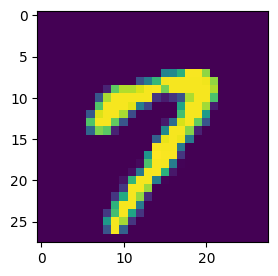

In [26]:
mnist_dataset.plot_image(15)

dataset 만들기  
D 만들기 -> data loader하며 train  
그래프로 D 확인, 값으로 확인  
G 만들기 -> data loader하며 D,G train  
그래프로 D,G 확인, 값으로 확인  


In [3]:
from torch.optim import SGD
from torch.nn import MSELoss

class D(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(784,200),
            torch.nn.Sigmoid(),
            torch.nn.Linear(200,1),
            torch.nn.Sigmoid(),
        )
        self.optimizer = SGD(self.parameters(),lr=0.01)
        self.loss_fn = MSELoss()
        self.loss_hist = []
    
    def forward(self,x):
        return self.model(x)

    def train(self,x,label):
        y_pred = self.model(x)
        loss = self.loss_fn(y_pred,label)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.loss_hist.append(loss.item())
    
    def visualize(self):
        plt.figure(figsize=(4,4))
        plt.scatter(np.arange(1,len(self.loss_hist)+1),self.loss_hist,s=0.5)
        plt.title('discriminator loss')
        plt.show()    
        


In [4]:
def gen_random(size):
    return torch.rand(size)


In [5]:
dataloader = DataLoader(mnist_dataset,1)
d = D()


for i,data in enumerate(dataloader): #enumerate 가능한가? 몇 epoch인지 출력하고 싶은데
    if i%(100)==0:
        print(f"i {i}")   
        if (d.loss_hist):
            print(f'd loss {d.loss_hist[-1]}')

    d.train(data.reshape(784),torch.tensor([1.0],dtype=torch.float32))
    d.train(gen_random(784),torch.tensor([0.0],dtype=torch.float32))
    if i>1000:
        break
 

NameError: name 'mnist_dataset' is not defined

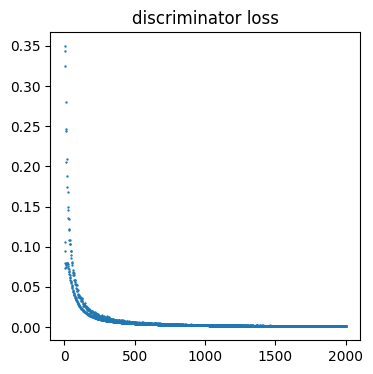

tensor([0.0271], grad_fn=<SigmoidBackward0>)
tensor([0.9709], grad_fn=<SigmoidBackward0>)


In [9]:
d.visualize()
print(d(gen_random(784)))
print(d(data.reshape(784)))

In [6]:
class G(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(1,200),
            torch.nn.Sigmoid(),
            torch.nn.Linear(200,784),
            torch.nn.Sigmoid(),
        )

        self.optimizer = SGD(self.parameters(),lr=0.01)
        
        self.loss_hist = []

    def forward(self,x):
        return self.model(x)
    
    def train(self,D,x,label):
        fake_pred = self.forward(x)
        y_pred = D(fake_pred)
        loss = D.loss_fn(y_pred,label)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.loss_hist.append(loss.item())
    
    def visualize(self):
        plt.figure(figsize=(4,4))
        plt.scatter(np.arange(1,len(self.loss_hist)+1),self.loss_hist,s=0.5)
        plt.title('generator loss')
        plt.show()
    
    def visualize_8img(self,x):
        fake_pred = self.forward(x).detach().numpy() # size(16,28*28)
        fake_pred = fake_pred.reshape((-1,28,28)).transpose((1,0,2)).reshape((28,-1))

        plt.figure(figsize=(16,2))
        plt.title('generator prediction')
        plt.imshow(fake_pred, cmap='Blues')
        

In [7]:
j=0
for i in mnist_dataset:
    print(i)
    if j ==0:
        break

NameError: name 'mnist_dataset' is not defined

In [27]:
dataloader = DataLoader(mnist_dataset,1)
d = D()
g= G()



for i,data in enumerate(dataloader): #enumerate 가능한가? 몇 epoch인지 출력하고 싶은데


    d.train(data.reshape(784),torch.tensor([1.0],dtype=torch.float32))
    d.train(g(gen_random(1)).detach(),torch.tensor([0.0],dtype=torch.float32))
    g.train(d,gen_random(1),torch.tensor([1.0],dtype=torch.float32))

    if i%(100)==0:
        print(f"i {i}")   
        if (d.loss_hist):
            print(f'g loss {g.loss_hist[-1]}')
            print(f'd loss {d.loss_hist[-1]}')

i 0
g loss 0.2653617858886719
d loss 0.2726036310195923
i 100
g loss 0.3993290364742279
d loss 0.1552327573299408
i 200
g loss 0.5369593501091003
d loss 0.07915639132261276
i 300
g loss 0.636056661605835
d loss 0.044064220041036606
i 400
g loss 0.7088168859481812
d loss 0.02652723155915737
i 500
g loss 0.7522231936454773
d loss 0.018174126744270325
i 600
g loss 0.7855250835418701
d loss 0.01304592564702034
i 700
g loss 0.8059269785881042
d loss 0.010871022008359432
i 800
g loss 0.8167357444763184
d loss 0.00935996975749731
i 900
g loss 0.8221855759620667
d loss 0.008891581557691097
i 1000
g loss 0.8400815725326538
d loss 0.00733821839094162
i 1100
g loss 0.8472703695297241
d loss 0.006475992035120726
i 1200
g loss 0.8485100269317627
d loss 0.005989176221191883
i 1300
g loss 0.8584107756614685
d loss 0.005829040892422199
i 1400
g loss 0.8528138399124146
d loss 0.005796582903712988
i 1500
g loss 0.8583323955535889
d loss 0.00563706923276186
i 1600
g loss 0.8606913089752197
d loss 0.00553

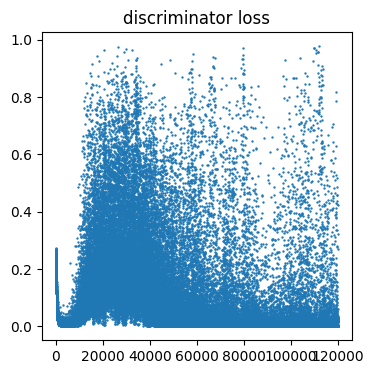

In [28]:
d.visualize()

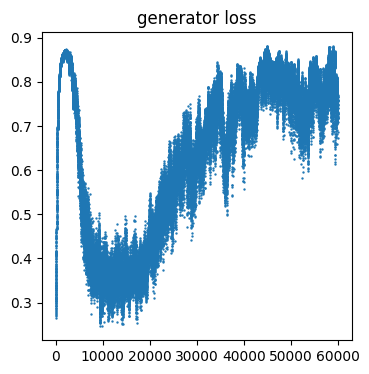

In [29]:
g.visualize()

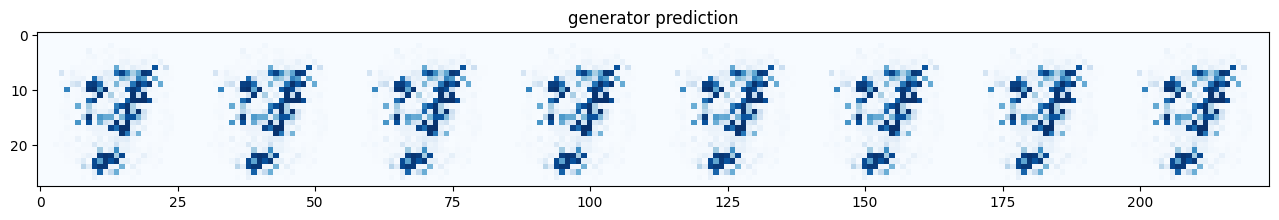

In [30]:
g.visualize_8img(gen_random((8,1)))